### Problem Statement: 
- Within the context of human resources (HR), attrition is a reduction in the workforce caused by retirement or resignation. This is a serious problem faced by several organizations around the world as attrition is economically damaging to the organizations as the replacement employees have to be hired at a cost and trained again at a cost. High Rates of Attrition also damages the brand value of the company. 
- Now the Dataset belongs to a very fast-growing company. This company has witnessed several employees leaving the company in the last 3 years. The company’s HR team has always been reactive to attrition but now the team wants to be proactive and wished to predict attrition of employees using the data they have in hand. 
- The goal here is to predict whether an employee will leave the company based upon the various variables given in the dataset.


### Need of Attrition Dataset: -
##### 1. Anticipation of Employee Attrition:
Supervisors and HR play a crucial role in workforce management, especially when they have insights into employees contemplating leaving the company. This foreknowledge enables proactive measures such as engaging with these employees to encourage them to stay or planning for the recruitment of suitable replacements to maintain a balanced workforce.

##### 2. Seamless Project Pipeline:
Ensuring a continuous and efficient workflow in a project relies on the consistent contribution of all team members. In the event of a key employee deciding to depart unexpectedly, the project's workflow may experience disruptions. Identifying potential attrition allows for preemptive measures to sustain a smooth and uninterrupted project pipeline.

##### 3. Optimized Hiring Practices:
When HR personnel are aware of employees expressing intentions to leave, they can strategically manage hiring processes. This knowledge empowers them to make informed decisions about the timing and quantity of new hires, ensuring that valuable assets are recruited as needed to maintain operational efficiency.

## Topic 1: -  Importing Libraries

In [1]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import imblearn
import re
%matplotlib inline
sns.set()

import warnings 
warnings.filterwarnings("ignore")

In [2]:
# Reading dataset
dataset = pd.read_csv("Train_Dataset.csv")

In [3]:
dataset.head()

EmployeeID  Attrition   Age TravelProfile Department  HomeToWork  \
0   5110001.0        0.0  35.0        Rarely  Analytics         5.0   
1   5110002.0        1.0  32.0           Yes      Sales         5.0   
2   5110003.0        0.0  31.0        Rarely  Analytics         5.0   
3   5110004.0        0.0  34.0           Yes      Sales        10.0   
4   5110005.0        0.0  37.0            No  Analytics        27.0   

  EducationField  Gender  HourlnWeek  Involvement  ...  JobSatisfaction ESOPs  \
0             CA    Male        69.0          1.0  ...              1.0   1.0   
1     Statistics  Female        62.0          4.0  ...              2.0   0.0   
2     Statistics       F        45.0          5.0  ...              2.0   1.0   
3     Statistics  Female        32.0          3.0  ...              4.0   1.0   
4     Statistics  Female        49.0          3.0  ...              4.0   1.0   

   NumCompaniesWorked  OverTime  SalaryHikelastYear  WorkExperience  \
0                 1.0       1.0                20.0             7.0   
1                 8.0       0.0                20.0             4.0   
2                 3.0       0.0                26.0            12.0   
3                 1.0       0.0                23.0             5.0   
4                 8.0       0.0                21.0            12.0   

   LastPromotion  CurrentProfile  MaritalStatus  MonthlyIncome  
0            2.0             NaN              M        18932.0  
1            1.0             NaN         Single        18785.0  
2            1.0             3.0         Single        22091.0  
3            1.0             3.0       Divorsed        20302.0  
4            1.0             9.0       Divorsed        21674.0  

[5 rows x 22 columns]

In [4]:
# Understanding Nature of Dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7810 entries, 0 to 7809
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EmployeeID          5180 non-null   float64
 1   Attrition           5180 non-null   float64
 2   Age                 4864 non-null   float64
 3   TravelProfile       5180 non-null   object 
 4   Department          5056 non-null   object 
 5   HomeToWork          4925 non-null   float64
 6   EducationField      5180 non-null   object 
 7   Gender              5134 non-null   object 
 8   HourlnWeek          4893 non-null   float64
 9   Involvement         5180 non-null   float64
 10  WorkLifeBalance     5180 non-null   float64
 11  Designation         5142 non-null   object 
 12  JobSatisfaction     5180 non-null   float64
 13  ESOPs               5180 non-null   float64
 14  NumCompaniesWorked  5180 non-null   float64
 15  OverTime            5180 non-null   float64
 16  Salary

## Topic 2: - Exploring Dataset & Data-preprocessing

In [5]:
def change_attribute(h):
    h = str(h)
    h = h.lower()
    if re.search(r'f', h):
        return 'Female'
    return h

dataset['Gender'] = dataset['Gender'].map(change_attribute)
dataset['Gender'] = dataset['Gender'].replace({'F': 'Female'})

In [6]:
dataset['Gender'].value_counts()

male      3094
nan       2676
Female    2040
Name: Gender, dtype: int64

In [7]:
def change_attribute_m(e):
    e = str(e)
    e = e.lower()
    if re.search(r'm',e):
        return 'Married'
    return e
dataset['MaritalStatus'] = dataset['MaritalStatus'].map(change_attribute_m)
dataset['MaritalStatus'] = dataset['MaritalStatus'].replace({'M':'Married'})

In [8]:
dataset['MaritalStatus'].value_counts()

nan         2630
Married     2388
single      1776
divorsed    1016
Name: MaritalStatus, dtype: int64

In [9]:
dataset = dataset.iloc[0:5180,:]

In [10]:
# Checking missing values
dataset.isnull().sum()

EmployeeID              0
Attrition               0
Age                   316
TravelProfile           0
Department            124
HomeToWork            255
EducationField          0
Gender                  0
HourlnWeek            287
Involvement             0
WorkLifeBalance         0
Designation            38
JobSatisfaction         0
ESOPs                   0
NumCompaniesWorked      0
OverTime                0
SalaryHikelastYear    169
WorkExperience        187
LastPromotion          70
CurrentProfile        311
MaritalStatus           0
MonthlyIncome          93
dtype: int64

#### Handling missing values is a crucial step in data preprocessing, especially when working with predictive modeling or machine learning tasks. Missing data can introduce bias, reduce the effectiveness of models, and lead to inaccurate predictions. Column name and DataType of missing data: - 

 
 -   Age                 (4864 non-null   float64)
 -   Department          (5056 non-null   object)
 -   HomeToWork          (4925 non-null   float64) 
 -   HourlnWeek          (4893 non-null   float64)
  -  Designation         (5142 non-null   object) 
  -  SalaryHikelastYear  (5011 non-null   float64)
  -  WorkExperience      (4993 non-null   float64)
  -  LastPromotion       (5110 non-null   float64)
  -  CurrentProfile      (4869 non-null   float64)
  -  MonthlyIncome       (5087 non-null   float64)

## Topic 3: - Handling missing values

In [11]:
list_miss_val = ['Age','HomeToWork','HourlnWeek','SalaryHikelastYear',
                    'WorkExperience','LastPromotion','CurrentProfile','MonthlyIncome']
for col in list_miss_val:
    dataset[col] = dataset[col].fillna(dataset[col].median())

In [12]:
dataset['Gender'].replace('nan', np.nan, inplace=True)
#dataset['Gender'].drop(inplace = True)

In [13]:
dataset['Gender'].value_counts()

male      3094
Female    2040
Name: Gender, dtype: int64

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5180 entries, 0 to 5179
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EmployeeID          5180 non-null   float64
 1   Attrition           5180 non-null   float64
 2   Age                 5180 non-null   float64
 3   TravelProfile       5180 non-null   object 
 4   Department          5056 non-null   object 
 5   HomeToWork          5180 non-null   float64
 6   EducationField      5180 non-null   object 
 7   Gender              5134 non-null   object 
 8   HourlnWeek          5180 non-null   float64
 9   Involvement         5180 non-null   float64
 10  WorkLifeBalance     5180 non-null   float64
 11  Designation         5142 non-null   object 
 12  JobSatisfaction     5180 non-null   float64
 13  ESOPs               5180 non-null   float64
 14  NumCompaniesWorked  5180 non-null   float64
 15  OverTime            5180 non-null   float64
 16  Salary

In [15]:
dataset['Department'] =dataset['Department'].fillna('Analytics')
dataset['Designation'] =dataset['Designation'].fillna('Executive')
dataset['Gender'] =dataset['Gender'].fillna('male')

In [16]:
dataset['Gender'].value_counts()

male      3140
Female    2040
Name: Gender, dtype: int64

## Topic 4: - Explore categorical variable

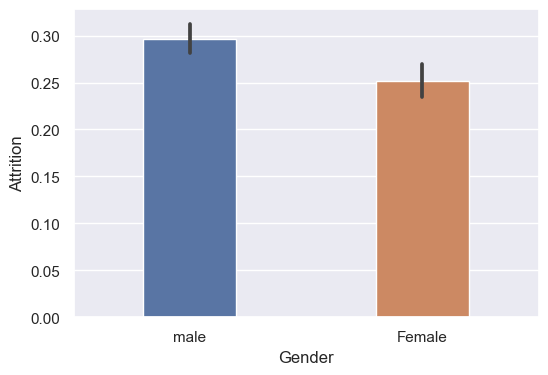

In [17]:
def cat_plot(X,Y):
    plt.figure(figsize=(6,4))
    #plt.subplot(121)
    sns.barplot(dataset,x=X,y=Y, width = 0.4)
    #plt.subplot(122)
    fig = px.pie(dataset, names=X, labels=Y, title=f'Pie Chart: {X} vs {Y}')
    plt.show()
    fig.show()
cat_plot('Gender','Attrition')

#### Here, it appears that the likelihood of attrition is significantly associated with gender, potentially influenced by various factors.

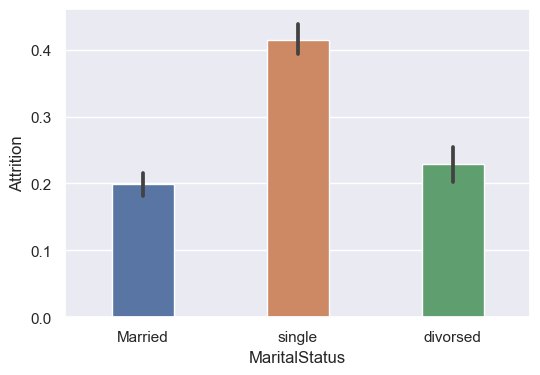

In [18]:
cat_plot('MaritalStatus', 'Attrition')

#### The connection between 'MaritalStatus' and 'Attrition' indicates diverse attrition rates among different marital statuses, encompassing observations in the married, single, and divorced categories.

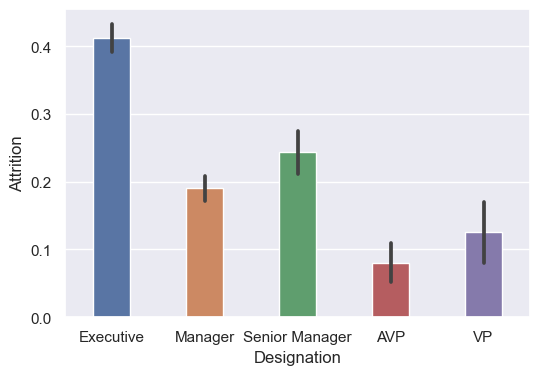

In [19]:
cat_plot('Designation', 'Attrition')

## Topic 5: - Label Encoding

In [20]:
#Label Encoder
from sklearn.preprocessing import LabelEncoder
leb_eco = LabelEncoder()

In [21]:
list_miss_obj = ['Department','Gender','Designation','TravelProfile','EducationField','MaritalStatus']
for col in list_miss_obj:
    dataset[col]=leb_eco.fit_transform(dataset[col])

In [22]:
# dataset after handling missing value
dataset.isnull().sum()

EmployeeID            0
Attrition             0
Age                   0
TravelProfile         0
Department            0
HomeToWork            0
EducationField        0
Gender                0
HourlnWeek            0
Involvement           0
WorkLifeBalance       0
Designation           0
JobSatisfaction       0
ESOPs                 0
NumCompaniesWorked    0
OverTime              0
SalaryHikelastYear    0
WorkExperience        0
LastPromotion         0
CurrentProfile        0
MaritalStatus         0
MonthlyIncome         0
dtype: int64

## Topic 6: - Checking Correlation

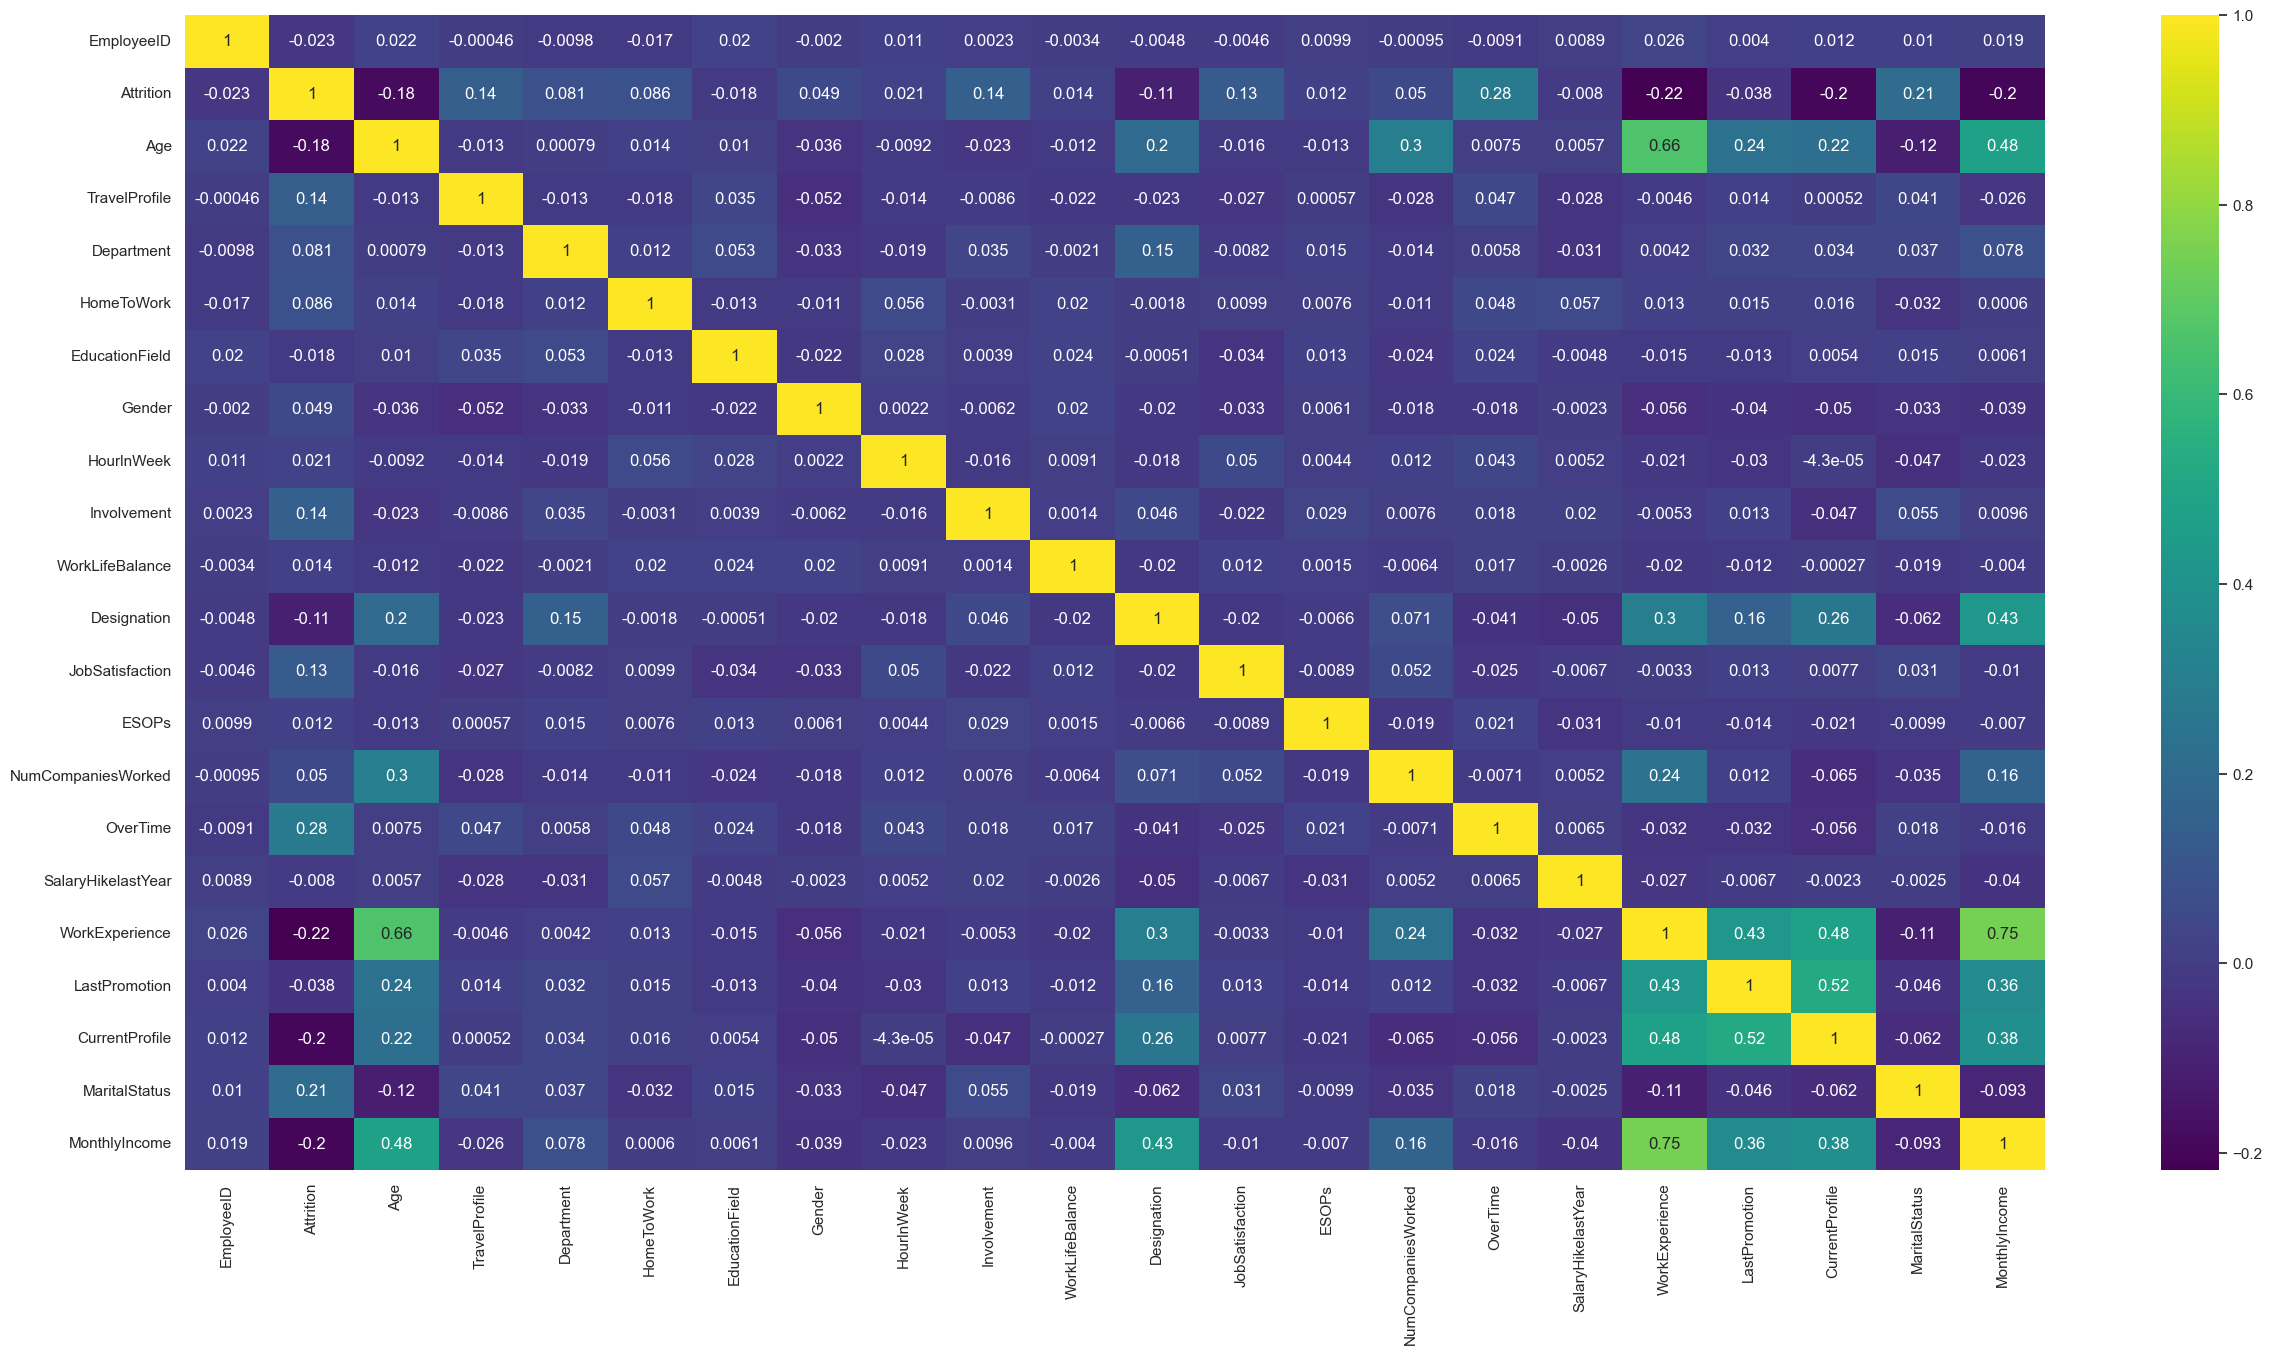

In [23]:
#checking for correlation
plt.figure(figsize=(30,15))
sns.heatmap(dataset.corr(), annot =True, cmap='viridis')
plt.show()

#### In this initial phase, our attempt to establish correlations between variables is hindered by the unprocessed state of the dataset, preventing us from obtaining the desired results. However, as we progress further into the project, we anticipate a more refined correlation plot facilitated by the utilization of processed data.

##  Topic 7: -Splitting Data intodependent and independent variable

In [24]:
x = dataset.iloc[:,0:]
y = dataset['Attrition']

In [25]:
x = x.drop('Attrition', axis = 1)
x.head()

EmployeeID   Age  TravelProfile  Department  HomeToWork  EducationField  \
0   5110001.0  35.0              1           0         5.0               0   
1   5110002.0  32.0              2           2         5.0               5   
2   5110003.0  31.0              1           0         5.0               5   
3   5110004.0  34.0              2           2        10.0               5   
4   5110005.0  37.0              0           0        27.0               5   

   Gender  HourlnWeek  Involvement  WorkLifeBalance  ...  JobSatisfaction  \
0       1        69.0          1.0              1.0  ...              1.0   
1       0        62.0          4.0              3.0  ...              2.0   
2       0        45.0          5.0              3.0  ...              2.0   
3       0        32.0          3.0              2.0  ...              4.0   
4       0        49.0          3.0              4.0  ...              4.0   

   ESOPs  NumCompaniesWorked  OverTime  SalaryHikelastYear  WorkExperience  \
0    1.0                 1.0       1.0                20.0             7.0   
1    0.0                 8.0       0.0                20.0             4.0   
2    1.0                 3.0       0.0                26.0            12.0   
3    1.0                 1.0       0.0                23.0             5.0   
4    1.0                 8.0       0.0                21.0            12.0   

   LastPromotion  CurrentProfile  MaritalStatus  MonthlyIncome  
0            2.0             3.0              0        18932.0  
1            1.0             3.0              2        18785.0  
2            1.0             3.0              2        22091.0  
3            1.0             3.0              1        20302.0  
4            1.0             9.0              1        21674.0  

[5 rows x 21 columns]

In [26]:
y.head()

0    0.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: Attrition, dtype: float64

## Topic 8: - imbalance treatment

In [27]:

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
x_ovr,y_ovr = ros.fit_resample(x,y)
print("Imbalanced dataset: ", y.value_counts())
print("******"*10)
print("Balanced Dataset: ",y_ovr.value_counts())

Imbalanced dataset:  0.0    3735
1.0    1445
Name: Attrition, dtype: int64
************************************************************
Balanced Dataset:  0.0    3735
1.0    3735
Name: Attrition, dtype: int64


In [28]:
#splitting dataset into train and test for self evaluation and prediction
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test= train_test_split(x_ovr,y_ovr,test_size = 0.25,random_state =12,stratify = y_ovr)

## Topic 9:- Building Models

We are going to use 10 models in this project for enhanced learning and selecting best model for dataset. As all them are not necessary but to eva;uate their accuracy and possible predictive models. 10 models we will building are as follows: - 
1. Logistic Regression - (solver used 'newton-cg')
2. Decision Tree
3. AdaBoost
4. XGBoost
5. Bagging Classifier
6. Random Forest Classifier
7. Gradient Boosting
8. KNN Model - Generally used for clinical dataset
9. SVM
10. Naive-Bayes Model

### 1. Model:- Logistic Regression

In [29]:
#Building Logistic model
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression( solver = 'newton-cg')
logit_model.fit(x_train,y_train)

LogisticRegression(solver='newton-cg')

In [30]:
y_pred_train = logit_model.predict(x_train)
y_pred_test = logit_model.predict(x_test)

In [31]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [32]:
def model_report(model):
    model_pred_train = model.predict(x_train)
    model_pred_test = model.predict(x_test)
    print("Classification Report Train: ",classification_report(y_train, model_pred_train))
    print("Classification Report Test: ", classification_report(y_test, model_pred_test))
    print("********"*10)
    print("Accuracy Score Train: ", accuracy_score(y_train,model_pred_train))
    print("Accuracy Score Test: ", accuracy_score(y_test,model_pred_test))
    print("********"*10)
    print("Confusion Matrix: ", confusion_matrix(y_train,model_pred_train))
    print("Confusion Matrix: ", confusion_matrix(y_test,model_pred_test))
    print("********"*10)

In [33]:
model_report(logit_model)

Classification Report Train:                precision    recall  f1-score   support

         0.0       0.76      0.74      0.75      2801
         1.0       0.75      0.76      0.75      2801

    accuracy                           0.75      5602
   macro avg       0.75      0.75      0.75      5602
weighted avg       0.75      0.75      0.75      5602

Classification Report Test:                precision    recall  f1-score   support

         0.0       0.76      0.73      0.74       934
         1.0       0.74      0.77      0.76       934

    accuracy                           0.75      1868
   macro avg       0.75      0.75      0.75      1868
weighted avg       0.75      0.75      0.75      1868

********************************************************************************
Accuracy Score Train:  0.7506247768654052
Accuracy Score Test:  0.75
********************************************************************************
Confusion Matrix:  [[2077  724]
 [ 673 2128]]
Confusion 

In [34]:
from sklearn.model_selection import cross_val_score
Cv_score = cross_val_score(logit_model,x_train,y_train, cv =5,scoring = 'accuracy')
print("cv_score accuracy: ", Cv_score)
print('------'*9)
print("cv score mean accuracy: ", Cv_score.mean())

cv_score accuracy:  [0.74843889 0.74576271 0.76160714 0.73928571 0.73928571]
------------------------------------------------------
cv score mean accuracy:  0.746876035427552


In [35]:
accuracy_score_logit_train = accuracy_score(y_train, y_pred_train)
accuracy_score_logit_test = accuracy_score(y_test, y_pred_test)

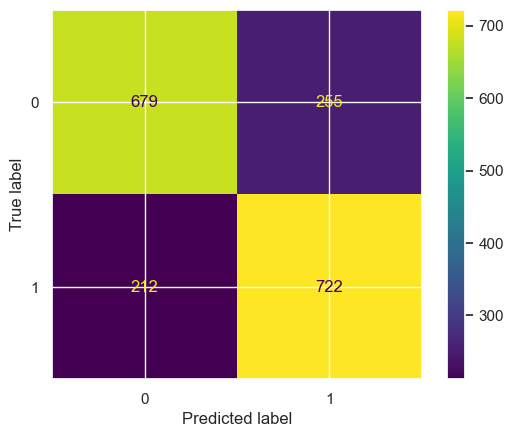

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay
c_matrix=ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_test))
c_matrix.plot(cmap = plt.cm.viridis)
plt.show()

### 2. Model:- Decision Tree Classification

In [37]:
# Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dtree1 = DecisionTreeClassifier(criterion = 'gini')
dtree1.fit(x_train,y_train)

DecisionTreeClassifier()

In [38]:
dtree2 = DecisionTreeClassifier(criterion = 'entropy')
dtree2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [39]:
#dtree1 = here criterion = Gini
y_pred_dtree1 = dtree1.predict(x_train)
y_pred_dtree1_test = dtree1.predict(x_test)

In [40]:
#dtree2 = here criterion = Entropy
y_pred_dtree2 = dtree2.predict(x_train)
y_pred_dtree2_test = dtree2.predict(x_test)

##### ==> dtree1 :-  criterion = Gini

In [41]:
model_report(dtree1)

Classification Report Train:                precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2801
         1.0       1.00      1.00      1.00      2801

    accuracy                           1.00      5602
   macro avg       1.00      1.00      1.00      5602
weighted avg       1.00      1.00      1.00      5602

Classification Report Test:                precision    recall  f1-score   support

         0.0       1.00      0.94      0.97       934
         1.0       0.94      1.00      0.97       934

    accuracy                           0.97      1868
   macro avg       0.97      0.97      0.97      1868
weighted avg       0.97      0.97      0.97      1868

********************************************************************************
Accuracy Score Train:  1.0
Accuracy Score Test:  0.9684154175588865
********************************************************************************
Confusion Matrix:  [[2801    0]
 [   0 2801]]
Confusion M

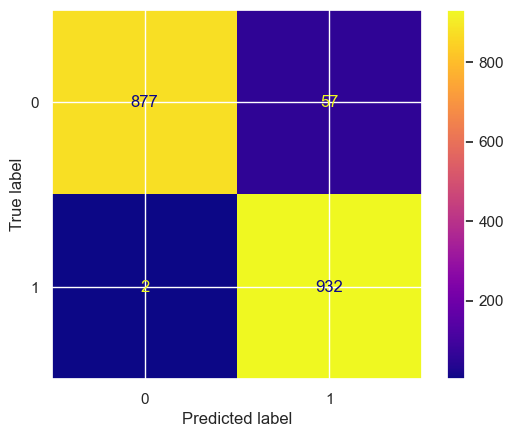

In [42]:
cmatrix_dt = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_dtree1_test))
cmatrix_dt.plot(cmap = plt.cm.plasma)
plt.show()

#### ==> dtree2 = here criterion = Entropy

In [43]:
model_report(dtree2)

Classification Report Train:                precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2801
         1.0       1.00      1.00      1.00      2801

    accuracy                           1.00      5602
   macro avg       1.00      1.00      1.00      5602
weighted avg       1.00      1.00      1.00      5602

Classification Report Test:                precision    recall  f1-score   support

         0.0       1.00      0.94      0.97       934
         1.0       0.94      1.00      0.97       934

    accuracy                           0.97      1868
   macro avg       0.97      0.97      0.97      1868
weighted avg       0.97      0.97      0.97      1868

********************************************************************************
Accuracy Score Train:  1.0
Accuracy Score Test:  0.9678800856531049
********************************************************************************
Confusion Matrix:  [[2801    0]
 [   0 2801]]
Confusion M

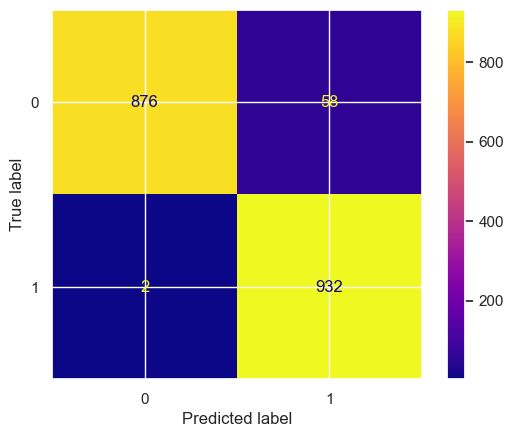

In [44]:
cmatrix_dt = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_dtree2_test))
cmatrix_dt.plot(cmap = plt.cm.plasma)
plt.show()

### Post Pruning in Decision Tree

In [45]:
# We will go with gini criteria and move further for post pruning
dtree1.feature_importances_

array([0.00313332, 0.11824838, 0.02827006, 0.03181359, 0.06750274,
       0.02805833, 0.02447474, 0.04852975, 0.02667731, 0.00942425,
       0.01347904, 0.04954923, 0.00119005, 0.05126732, 0.10058153,
       0.03894726, 0.10461424, 0.04821443, 0.03986122, 0.05124683,
       0.11491638])

In [46]:
pd.DataFrame(index=x.columns, data= dtree1.feature_importances_, columns = ['Feature'] )

Feature
EmployeeID          0.003133
Age                 0.118248
TravelProfile       0.028270
Department          0.031814
HomeToWork          0.067503
EducationField      0.028058
Gender              0.024475
HourlnWeek          0.048530
Involvement         0.026677
WorkLifeBalance     0.009424
Designation         0.013479
JobSatisfaction     0.049549
ESOPs               0.001190
NumCompaniesWorked  0.051267
OverTime            0.100582
SalaryHikelastYear  0.038947
WorkExperience      0.104614
LastPromotion       0.048214
CurrentProfile      0.039861
MaritalStatus       0.051247
MonthlyIncome       0.114916

In [47]:
#let's see depth of Decsion Tree 
depth = dtree1.tree_.max_depth
print("Depth of dtree1, Decision Tree is: ",depth)

Depth of dtree1, Decision Tree is:  21


In [48]:
prun_tree = DecisionTreeClassifier(criterion = 'gini',max_depth = 10)
prun_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [49]:
y_pred_train_prun = prun_tree.predict(x_train)
y_pred_test_prun = prun_tree.predict(x_test)

In [50]:
acc_prun_train = accuracy_score(y_train, y_pred_train_prun)
acc_prun_test = accuracy_score(y_test, y_pred_test_prun)

In [51]:
model_report(prun_tree)

Classification Report Train:                precision    recall  f1-score   support

         0.0       0.93      0.94      0.93      2801
         1.0       0.94      0.93      0.93      2801

    accuracy                           0.93      5602
   macro avg       0.93      0.93      0.93      5602
weighted avg       0.93      0.93      0.93      5602

Classification Report Test:                precision    recall  f1-score   support

         0.0       0.91      0.91      0.91       934
         1.0       0.91      0.91      0.91       934

    accuracy                           0.91      1868
   macro avg       0.91      0.91      0.91      1868
weighted avg       0.91      0.91      0.91      1868

********************************************************************************
Accuracy Score Train:  0.9316315601570867
Accuracy Score Test:  0.9068522483940042
********************************************************************************
Confusion Matrix:  [[2623  178]
 [ 205 259

In [52]:
accuracy_final_dtree_train = accuracy_score(y_train,y_pred_dtree1)
accuracy_final_dtree_test = accuracy_score(y_test,y_pred_dtree1_test)

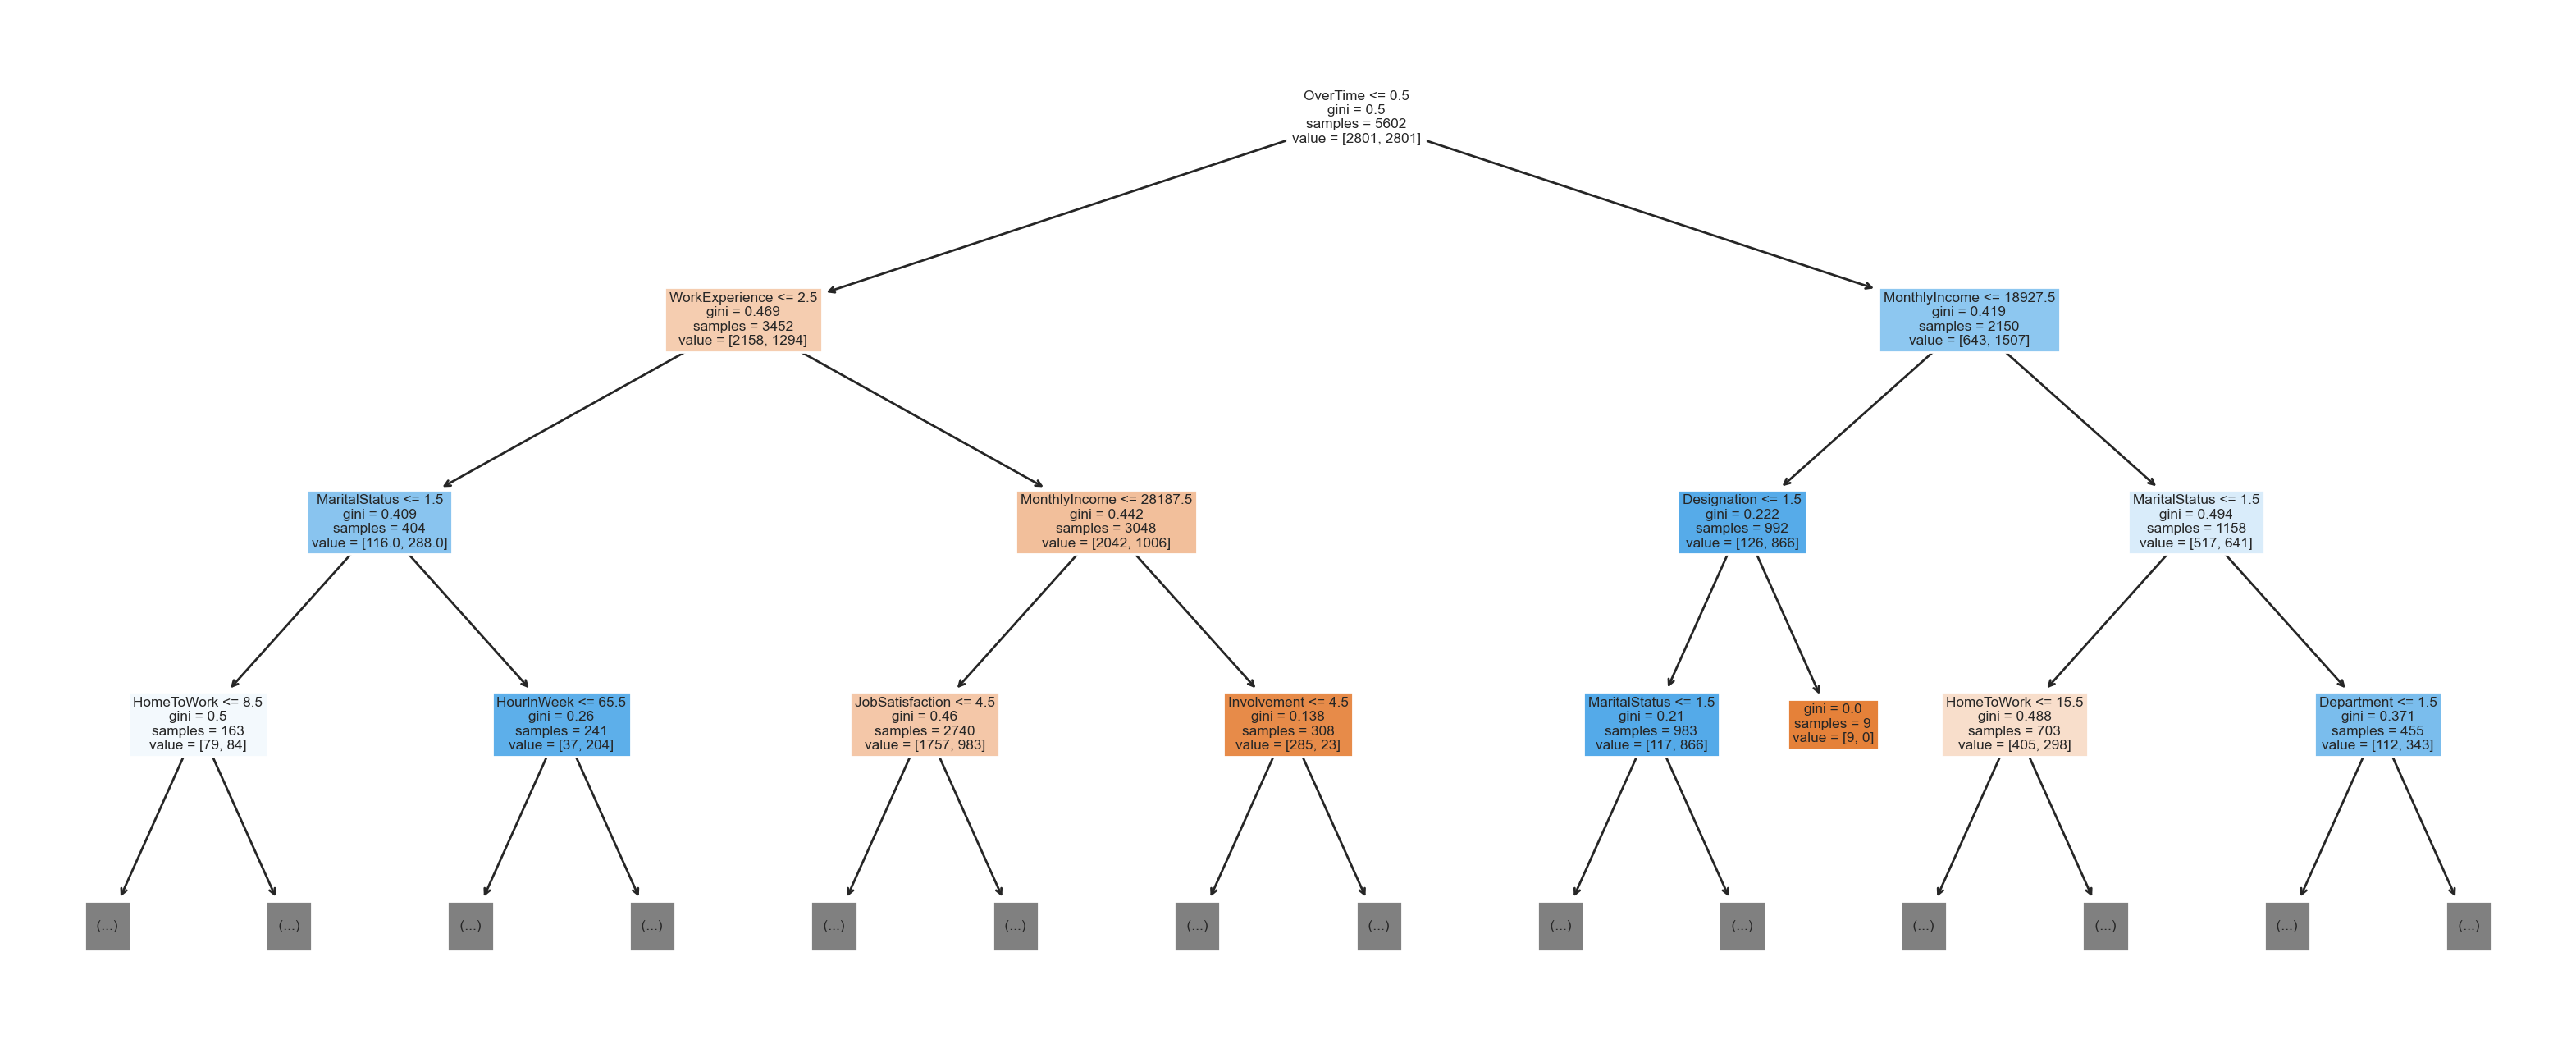

In [53]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,8), dpi = 200)
plot_tree(prun_tree,filled=True,feature_names = x.columns, max_depth=3)
plt.show()

### Model 3:- AdaBoost

In [54]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(x_train,y_train)

AdaBoostClassifier()

In [55]:
y_pred_train_ada = ada.predict(x_train)
y_pred_test_ada = ada.predict(x_test)

In [56]:
acc_ada_train = accuracy_score(y_train,y_pred_train_ada)
acc_ada_test = accuracy_score(y_test,y_pred_test_ada)

In [57]:
model_report(ada)

Classification Report Train:                precision    recall  f1-score   support

         0.0       0.80      0.79      0.79      2801
         1.0       0.79      0.80      0.80      2801

    accuracy                           0.79      5602
   macro avg       0.79      0.79      0.79      5602
weighted avg       0.79      0.79      0.79      5602

Classification Report Test:                precision    recall  f1-score   support

         0.0       0.79      0.78      0.78       934
         1.0       0.78      0.80      0.79       934

    accuracy                           0.79      1868
   macro avg       0.79      0.79      0.79      1868
weighted avg       0.79      0.79      0.79      1868

********************************************************************************
Accuracy Score Train:  0.7943591574437701
Accuracy Score Test:  0.7864025695931478
********************************************************************************
Confusion Matrix:  [[2214  587]
 [ 565 223

### 4.Model:- XGBoost

In [58]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [59]:
y_pred_train_xgb = xgb.predict(x_train)
y_pred_test_xgb = xgb.predict(x_test)

In [60]:
model_report(xgb)

Classification Report Train:                precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2801
         1.0       1.00      1.00      1.00      2801

    accuracy                           1.00      5602
   macro avg       1.00      1.00      1.00      5602
weighted avg       1.00      1.00      1.00      5602

Classification Report Test:                precision    recall  f1-score   support

         0.0       1.00      0.97      0.98       934
         1.0       0.97      1.00      0.98       934

    accuracy                           0.98      1868
   macro avg       0.98      0.98      0.98      1868
weighted avg       0.98      0.98      0.98      1868

********************************************************************************
Accuracy Score Train:  1.0
Accuracy Score Test:  0.9839400428265525
********************************************************************************
Confusion Matrix:  [[2801    0]
 [   0 2801]]
Confusion M

In [61]:
# Cross val score


cv_score = cross_val_score(xgb,x_train,y_train, cv = 5, scoring = 'accuracy')
print("cross validation score: ", cv_score)
print('------'*9)
print("cross validation score mean: ", cv_score.mean())

cross validation score:  [0.98661909 0.9794826  0.98125    0.9875     0.975     ]
------------------------------------------------------
cross validation score mean:  0.9819703389830508


In [62]:
acc_xgb_train = accuracy_score(y_train,y_pred_train_xgb)
acc_xgb_test = accuracy_score(y_test,y_pred_test_xgb)

### 5.Model: - Bagging Classifier

In [63]:
from sklearn.ensemble import BaggingClassifier
bgc = BaggingClassifier()
bgc.fit(x_train,y_train)

BaggingClassifier()

In [64]:
y_pred_train_bgc = bgc.predict(x_train)
y_pred_test_bgc = bgc.predict(x_test)

In [65]:
acc_bgc_train = accuracy_score(y_train,y_pred_train_bgc)
acc_bgc_test = accuracy_score(y_test,y_pred_test_bgc)

In [66]:
model_report(bgc)

Classification Report Train:                precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2801
         1.0       1.00      1.00      1.00      2801

    accuracy                           1.00      5602
   macro avg       1.00      1.00      1.00      5602
weighted avg       1.00      1.00      1.00      5602

Classification Report Test:                precision    recall  f1-score   support

         0.0       1.00      0.97      0.98       934
         1.0       0.97      1.00      0.98       934

    accuracy                           0.98      1868
   macro avg       0.98      0.98      0.98      1868
weighted avg       0.98      0.98      0.98      1868

********************************************************************************
Accuracy Score Train:  0.99982149232417
Accuracy Score Test:  0.9828693790149893
********************************************************************************
Confusion Matrix:  [[2800    1]
 [   0 2801]

In [67]:
cv_score = cross_val_score(bgc, x_train, y_train, cv = 5, scoring = 'accuracy')
print("CV Score: ", cv_score)
print("------"*9)
print("CV mean score: ", cv_score.mean())

CV Score:  [0.96431757 0.97145406 0.97678571 0.96875    0.96428571]
------------------------------------------------------
CV mean score:  0.9691186122084872


### 6. Model:- RandomForest Classification

In [68]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [69]:
y_pred_train_rfc = rfc.predict(x_train)
y_pred_test_rfc = rfc.predict(x_test)

In [70]:
model_report(rfc)

Classification Report Train:                precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2801
         1.0       1.00      1.00      1.00      2801

    accuracy                           1.00      5602
   macro avg       1.00      1.00      1.00      5602
weighted avg       1.00      1.00      1.00      5602

Classification Report Test:                precision    recall  f1-score   support

         0.0       0.99      0.98      0.99       934
         1.0       0.98      0.99      0.99       934

    accuracy                           0.99      1868
   macro avg       0.99      0.99      0.99      1868
weighted avg       0.99      0.99      0.99      1868

********************************************************************************
Accuracy Score Train:  1.0
Accuracy Score Test:  0.9866167023554604
********************************************************************************
Confusion Matrix:  [[2801    0]
 [   0 2801]]
Confusion M

In [71]:
cv_score = cross_val_score(rfc,x_train,y_train, cv = 5, scoring = 'accuracy')
print("cross validation score: ", cv_score)
print('------'*9)
print("cross validation score mean: ", cv_score.mean())

cross validation score:  [0.99375558 0.97859054 0.9875     0.98660714 0.98125   ]
------------------------------------------------------
cross validation score mean:  0.9855406524786542


In [72]:
acc_rfc_train = accuracy_score(y_train,y_pred_train_rfc)
acc_rfc_test = accuracy_score(y_test,y_pred_test_rfc)

In [73]:
acc_rfc_train

1.0

### 7. Model:-  Gradient Descent

In [74]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [75]:
y_pred_train_gbc = gbc.predict(x_train)
y_pred_test_gbc = gbc.predict(x_test)

In [76]:
acc_gbc_train = accuracy_score(y_train,y_pred_train_gbc)
acc_gbc_test = accuracy_score(y_test,y_pred_test_gbc)

In [77]:
model_report(gbc)

Classification Report Train:                precision    recall  f1-score   support

         0.0       0.88      0.89      0.88      2801
         1.0       0.88      0.88      0.88      2801

    accuracy                           0.88      5602
   macro avg       0.88      0.88      0.88      5602
weighted avg       0.88      0.88      0.88      5602

Classification Report Test:                precision    recall  f1-score   support

         0.0       0.88      0.85      0.86       934
         1.0       0.85      0.88      0.87       934

    accuracy                           0.86      1868
   macro avg       0.86      0.86      0.86      1868
weighted avg       0.86      0.86      0.86      1868

********************************************************************************
Accuracy Score Train:  0.8821849339521599
Accuracy Score Test:  0.8645610278372591
********************************************************************************
Confusion Matrix:  [[2479  322]
 [ 338 246

### 8. Model:- K-Nearest Neighbours(KNN)

In [78]:
from sklearn.neighbors import KNeighborsClassifier

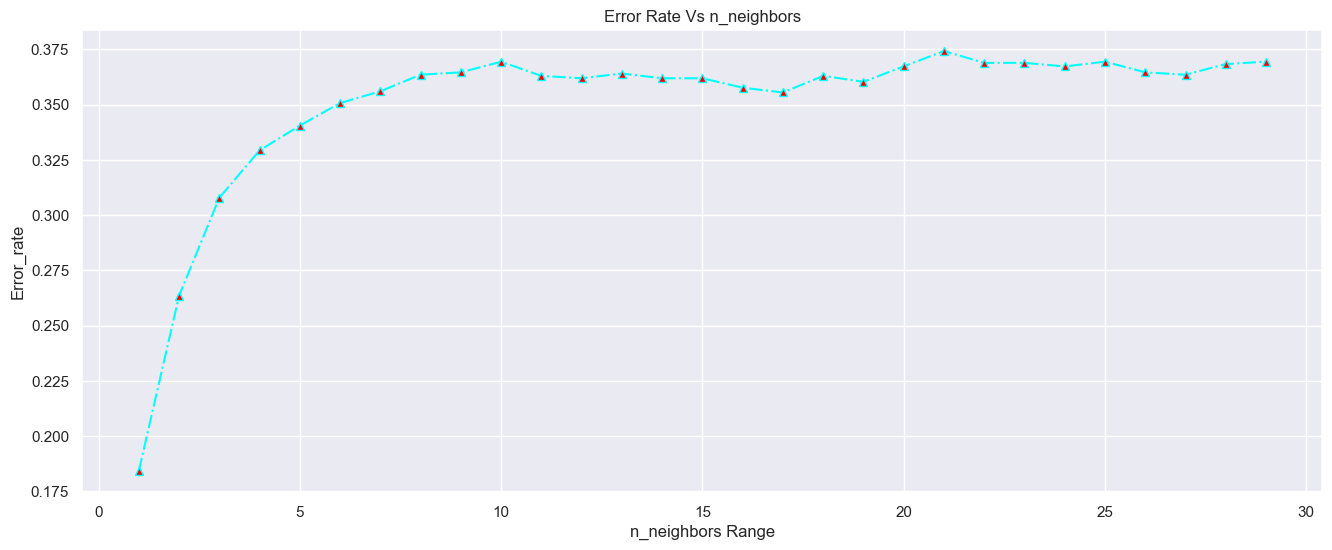

In [79]:
# In knn theri is parameter n_neighbors but we dont know which is the best so to choose best knn parameter we will go with loop statement and find out best possible neighbors
error_rate = []
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train,y_train)
    y_pred_test_knn = knn.predict(x_test)
    error_rate.append(1 - accuracy_score(y_test,y_pred_test_knn))

# Let's Visualize all error Rates
plt.figure(figsize=(16,6))
plt.plot(range(1,30),error_rate, color='cyan', marker = '^', linestyle = '-.', markerfacecolor = 'red' )
plt.title("Error Rate Vs n_neighbors")
plt.xlabel("n_neighbors Range")
plt.ylabel("Error_rate")
plt.show()

<span style="color: purple"> As we can see in above visualization the best n_neighbors =1, which shows us that only single dataset is providing the best performance. But, n_neighbors = 1 can lead to problem low bias and high variance. To solve this problem we have to do trade off between bian and variance we will choose next n_neighbors which can solve problem of this sensitivity and will imporove performance of our model.</span>


In [80]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [81]:
y_pred_train_knn = knn.predict(x_train)
y_pred_test_knn = knn.predict(x_test)

In [82]:
acc_knn_train = accuracy_score(y_train,y_pred_train_knn)
acc_knn_test = accuracy_score(y_test,y_pred_test_knn)

In [83]:
model_report(knn)

Classification Report Train:                precision    recall  f1-score   support

         0.0       0.82      0.70      0.75      2801
         1.0       0.74      0.85      0.79      2801

    accuracy                           0.77      5602
   macro avg       0.78      0.77      0.77      5602
weighted avg       0.78      0.77      0.77      5602

Classification Report Test:                precision    recall  f1-score   support

         0.0       0.68      0.60      0.64       934
         1.0       0.64      0.72      0.68       934

    accuracy                           0.66      1868
   macro avg       0.66      0.66      0.66      1868
weighted avg       0.66      0.66      0.66      1868

********************************************************************************
Accuracy Score Train:  0.7738307747233131
Accuracy Score Test:  0.6595289079229122
********************************************************************************
Confusion Matrix:  [[1952  849]
 [ 418 238

#### 9. Model:- Support Vector Machines(SVM)

In [84]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((-1,1))
x_train1 = scaler.fit_transform(x_train)
x_test1 = scaler.fit_transform(x_test)
pd.DataFrame(x_train1).head()
pd.DataFrame(x_test1).head()

0         1    2    3         4    5    6         7    8    9   ...  \
0  0.601549  0.581395  0.0 -1.0 -0.548387  1.0  1.0  0.285714  0.0  0.0  ...   
1 -0.989545 -0.674419  0.0 -1.0  0.225806  1.0 -1.0  0.628571  0.0 -0.5  ...   
2  0.438916  0.674419  0.0  1.0  0.677419  1.0  1.0  0.600000  0.0 -1.0  ...   
3 -0.937270 -0.069767  0.0 -1.0 -0.225806 -1.0  1.0  0.371429  0.0  0.0  ...   
4 -0.419555 -0.488372  0.0  1.0  0.806452  1.0  1.0  0.085714  0.5  0.0  ...   

    11   12        13   14        15        16     17        18   19        20  
0  0.5  1.0 -0.333333 -1.0  0.066667 -0.121951 -0.500 -1.000000  1.0 -0.058204  
1  0.5  1.0 -0.809524 -1.0 -0.600000 -0.902439 -0.875 -0.888889 -1.0 -0.783627  
2  1.0  1.0 -0.333333  1.0 -0.600000 -0.219512 -0.625 -0.666667  1.0  0.042362  
3  1.0  1.0 -0.809524 -1.0 -0.333333 -0.463415 -0.875  0.000000  1.0 -0.582794  
4  1.0 -1.0 -0.809524 -1.0 -0.866667 -0.707317 -0.875 -0.444444  0.0 -0.531559  

[5 rows x 21 columns]

In [85]:
from sklearn.svm import SVC
# kernel = 'linear'
svc_linear = SVC(kernel = "linear")
svc_linear.fit(x_train1,y_train)

#kernel = 'sigmoid'
svc_sigmoid = SVC(kernel = "sigmoid")
svc_sigmoid.fit(x_train1, y_train)

# kernel = 'poly'
svc_poly = SVC(kernel = "poly")
svc_poly.fit(x_train1, y_train)

# kernel = 'rbf'
svc_rbf = SVC(kernel = "rbf")
svc_rbf.fit(x_train1, y_train)

SVC()

In [86]:

# kernel = 'linear'

y_pred_train = svc_linear.predict(x_train1)
y_pred_test = svc_linear.predict(x_test1)
acc_score_lr_train = accuracy_score(y_train, y_pred_train)
acc_score_lr_test = accuracy_score(y_test, y_pred_test)
print("Linear Model:- ")
print()
print("Train Accuracy score: ",acc_score_lr_train )
print("Test Accuracy Score: ",acc_score_lr_test)
print("--------"*9)


# kernel = 'sigmoid'

y_pred_train_s = svc_sigmoid.predict(x_train1)
y_pred_test_s = svc_sigmoid.predict(x_test1)
acc_score_sg_train = accuracy_score(y_train, y_pred_train_s)
acc_score_sg_test = accuracy_score(y_test, y_pred_test_s)
print("Sigmoid Model:- ")
print()
print("Train Accuracy score: ",acc_score_sg_train )
print("Test Accuracy Score: ",acc_score_sg_test)
print("--------"*9)

# kernel = 'poly'

y_pred_train_p = svc_poly.predict(x_train1)
y_pred_test_p = svc_poly.predict(x_test1)
acc_score_pl_train = accuracy_score(y_train, y_pred_train_p)
acc_score_pl_test = accuracy_score(y_test, y_pred_test_p)
print("Poly Model:- ")
print()
print("Train Accuracy score: ",acc_score_pl_train )
print("Test Accuracy Score: ",acc_score_pl_test)
print("--------"*9)

# kernel = 'rbf'

y_pred_train_rbf = svc_rbf.predict(x_train1)
y_pred_test_rbf = svc_rbf.predict(x_test1)
acc_score_rbf_train = accuracy_score(y_train, y_pred_train_rbf)
acc_score_rbf_test = accuracy_score(y_test, y_pred_test_rbf)
print("Sigmoid Model:- ")
print()
print("Train Accuracy score: ",acc_score_rbf_train )
print("Test Accuracy Score: ",acc_score_rbf_test)
print("--------"*9)

Linear Model:- 

Train Accuracy score:  0.7533023920028561
Test Accuracy Score:  0.7285867237687366
------------------------------------------------------------------------
Sigmoid Model:- 

Train Accuracy score:  0.5946090681899322
Test Accuracy Score:  0.6343683083511777
------------------------------------------------------------------------
Poly Model:- 

Train Accuracy score:  0.8902177793645126
Test Accuracy Score:  0.8452890792291221
------------------------------------------------------------------------
Sigmoid Model:- 

Train Accuracy score:  0.8746876115672974
Test Accuracy Score:  0.8340471092077087
------------------------------------------------------------------------


In [87]:
list1 = ['SVM_Linear','SVM_Sigmoid','SVM_Poly','SVM_RBF']
list2 = [acc_score_lr_test,acc_score_sg_test,acc_score_pl_test,
        acc_score_rbf_test]
list3 = [acc_score_lr_train,acc_score_sg_train,acc_score_pl_train,
        acc_score_rbf_train]
df_train_accuracy = pd.DataFrame({'Method Used':list1, "Accuracy": list3})
df_test_accuracy = pd.DataFrame({'Method Used':list1, "Accuracy": list2})

AxesSubplot(0.125,0.11;0.775x0.77)


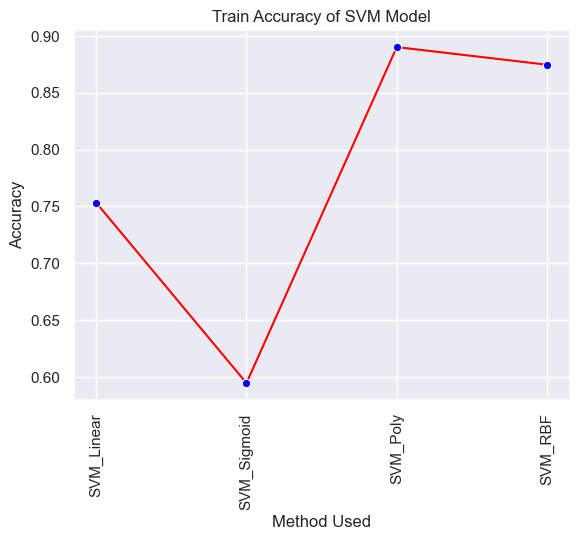

In [88]:
train_plot = sns.lineplot(x = 'Method Used', y = 'Accuracy',data = df_train_accuracy, color = 'red', marker = 'o', markerfacecolor = 'blue')
train_plot.set_xticklabels(train_plot.get_xticklabels(), rotation = 90)
plt.title("Train Accuracy of SVM Model")
print(train_plot)

AxesSubplot(0.125,0.11;0.775x0.77)


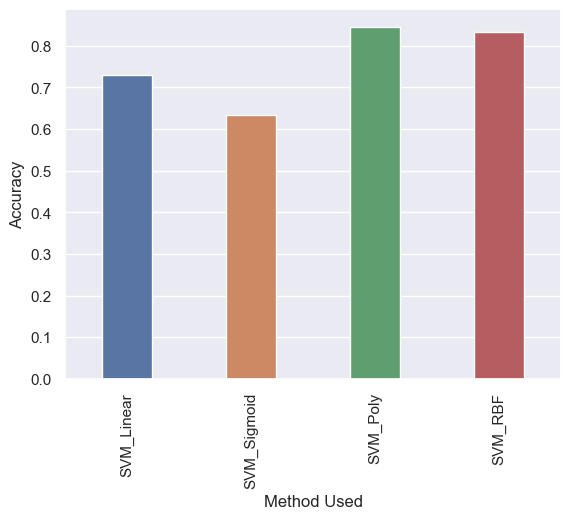

In [89]:
test_plot = sns.barplot(x='Method Used', y='Accuracy', data = df_test_accuracy, width =0.4)
test_plot.set_xticklabels(test_plot.get_xticklabels(), rotation = 90)
print(test_plot)

#### 10. Model:-  Naive Bayes

In [90]:
# BernoulliNB
from sklearn.naive_bayes import BernoulliNB
bern = BernoulliNB()
bern.fit(x_train1, y_train)

BernoulliNB()

In [91]:
y_pred_train_bern = bern.predict(x_train1)
y_pred_test_bern = bern.predict(x_test1)

In [92]:
acc_score_bern_train = accuracy_score(y_train, y_pred_train_bern)
acc_score_bern_test = accuracy_score(y_test, y_pred_test_bern)
print("Naive Bayes Model(BernoulliNB):- ")
print()
print("Train Accuracy score: ",acc_score_bern_train )
print("Test Accuracy Score: ",acc_score_bern_test)
print("--------"*9)

Naive Bayes Model(BernoulliNB):- 

Train Accuracy score:  0.7158157800785434
Test Accuracy Score:  0.7119914346895075
------------------------------------------------------------------------


In [93]:
#GaussianNB
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train1,y_train)

GaussianNB()

In [94]:
y_pred_train_bern = gnb.predict(x_train1)
y_pred_test_bern = gnb.predict(x_test1)

In [95]:
acc_score_gnb_train = accuracy_score(y_train, y_pred_train_bern)
acc_score_gnb_test = accuracy_score(y_test, y_pred_test_bern)
print("Naive Bayes Model(GaussianNB):- ")
print()
print("Train Accuracy score: ",acc_score_gnb_train )
print("Test Accuracy Score: ",acc_score_gnb_test)
print("--------"*9)

Naive Bayes Model(GaussianNB):- 

Train Accuracy score:  0.679221706533381
Test Accuracy Score:  0.6605995717344754
------------------------------------------------------------------------


Train data - Method vs Accuracy AxesSubplot(0.125,0.11;0.775x0.77)


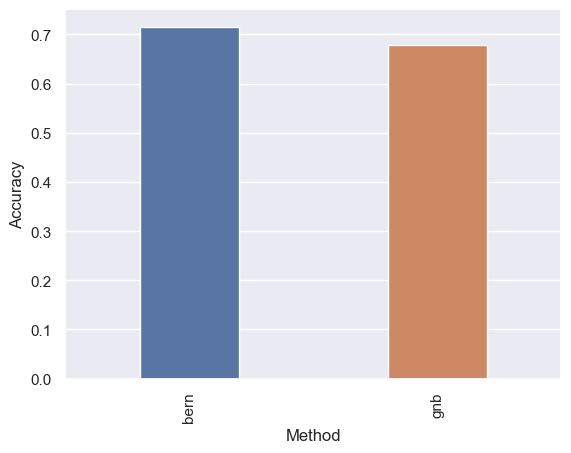

In [96]:
list_model = ['bern','gnb']
list_train = [acc_score_bern_train, acc_score_gnb_train]
list_test =[acc_score_bern_test, acc_score_gnb_test]
df_train_acc = pd.DataFrame({'Method': list_model, 'Accuracy':list_train})
df_test_acc = pd.DataFrame({'Method': list_model, 'Accuracy':list_test})

#plotting graph using above list for train data
graph = sns.barplot(x = 'Method', y = 'Accuracy',data = df_train_acc, width = 0.4)
graph.set_xticklabels(graph.get_xticklabels(), rotation = 90)
print("Train data - Method vs Accuracy", graph)


Test data - Method vs Accuracy AxesSubplot(0.125,0.11;0.775x0.77)


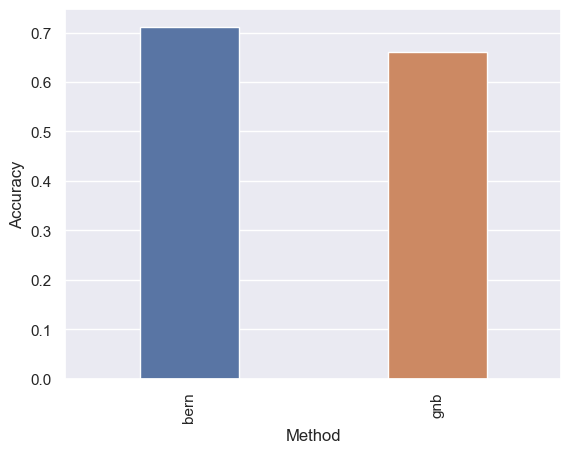

In [97]:
graph = sns.barplot(x = 'Method', y = 'Accuracy',data = df_test_acc, width = 0.4)
graph.set_xticklabels(graph.get_xticklabels(), rotation = 90)
print("Test data - Method vs Accuracy", graph)

## Topic 10: - Choosing best models for hyperparameter Tunning

In [98]:
list_final_model = ['logit_model', 'prun_tree','ada', 'xgb','bgc','rfc','gbc','knn','svc_linear','svc_sigmoid','svc_poly','scv_rbf','bern','gnb']
list_final_acc_train_model = [accuracy_score_logit_train,  acc_prun_train, acc_ada_train, acc_xgb_train, acc_bgc_train, acc_rfc_train, acc_gbc_train, acc_knn_train,
                              acc_score_lr_train,acc_score_sg_train,acc_score_pl_train,
        acc_score_rbf_train,acc_score_gnb_train, acc_score_gnb_train]

list_final_acc_test_model  = [accuracy_score_logit_test, acc_prun_test, acc_ada_test,acc_xgb_test, acc_bgc_test, acc_rfc_test, acc_gbc_test, acc_knn_test,
                              acc_score_lr_test,acc_score_sg_test,acc_score_pl_test,acc_score_rbf_test, acc_score_gnb_test, acc_score_gnb_test ]

df_train_accuracy_final_allmodel = pd.DataFrame({'Method Used':list_final_model, "Accuracy": list_final_acc_train_model})
df_test_accuracy_final_allmodel = pd.DataFrame({'Method Used':list_final_model, "Accuracy": list_final_acc_test_model})

In [99]:
figure = px.bar(df_train_accuracy_final_allmodel,x = 'Method Used', y = 'Accuracy', text = 'Accuracy', 
                labels = { 'Accuracy':'Accuracy'}, title = 'Final Model - Method Used vs Accuracy')
figure.update_layout(xaxis_tickangle = -60)
figure.show()

In [100]:
figure = px.bar(df_test_accuracy_final_allmodel,x = 'Method Used', y = 'Accuracy', text = 'Accuracy', 
                labels = { 'Accuracy':'Accuracy'}, title = 'Final Model - Method Used vs Accuracy')
figure.update_layout(xaxis_tickangle = -60)
figure.show()

## Topic 11: - Hyperparameter Tunning for chosen model

In [101]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


class_model = {
    'xgb': XGBClassifier(),
    'gbc': GradientBoostingClassifier(),
    'bgc': BaggingClassifier(),
    'rfc': RandomForestClassifier(),
    'ada': AdaBoostClassifier(),
    
}

class_hyperparams = {
    'xgb': {'xgb__n_estimators': [100, 300,400], 'xgb__max_depth': [5,6,7,8], 'xgb__learning_rate': [0.005,0.007,0.008]},
    'gbc': {'gbc__n_estimators': [50, 100], 'gbc__learning_rate': [0.01, 0.001], 'gbc__max_depth': [5,6,7,8]},
    'bgc': {'bgc__n_estimators': [10,20,30], 'bgc__max_features': [0.4,0.5]},
    'rfc': {'rfc__n_estimators': [50, 100, 200], 'rfc__max_depth': [5,6,7,8  ]},
    'ada': {'ada__n_estimators': [50, 100, 200], 'ada__learning_rate': [0.01, 0.1]},
    
}

for cl_name, cls in class_model.items():
    class_hyperparam = class_hyperparams[cl_name]
    pipeline = Pipeline([('Scaler', StandardScaler()), (cl_name, cls)])
    
    grid_search = GridSearchCV(pipeline, class_hyperparam, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(x_train, y_train)
    
    print("-------" * 9)
    print(f"Best parameters for {cl_name} : {grid_search.best_params_}")
    
    
    
    print("ACCURACY: -")
    
    y_pred_train = grid_search.predict(x_train)
    y_pred_test = grid_search.predict(x_test)
    
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    
    print(f"Accuracy on train set for {cl_name}: {accuracy_train}")
    print(f"Accuracy on test set for {cl_name}: {accuracy_test}")


---------------------------------------------------------------
Best parameters for xgb : {'xgb__learning_rate': 0.008, 'xgb__max_depth': 8, 'xgb__n_estimators': 400}
ACCURACY: -
Accuracy on train set for xgb: 0.9914316315601571
Accuracy on test set for xgb: 0.9625267665952891
---------------------------------------------------------------
Best parameters for gbc : {'gbc__learning_rate': 0.01, 'gbc__max_depth': 8, 'gbc__n_estimators': 100}
ACCURACY: -
Accuracy on train set for gbc: 0.9568011424491253
Accuracy on test set for gbc: 0.9255888650963597
---------------------------------------------------------------
Best parameters for bgc : {'bgc__max_features': 0.4, 'bgc__n_estimators': 20}
ACCURACY: -
Accuracy on train set for bgc: 1.0
Accuracy on test set for bgc: 0.9892933618843683
---------------------------------------------------------------
Best parameters for rfc : {'rfc__max_depth': 8, 'rfc__n_estimators': 200}
ACCURACY: -
Accuracy on train set for rfc: 0.9548375580149946
Accurac

#### In ouput of above code we can see best model with hiest accuracy isXGBClassifier. Hence will make above changes in XGBoost model as suggested in above code.
#### For XGBClassifier suggested changes are as follows:
---> Best parameters for xgb : {'xgb__learning_rate': 0.008, 'xgb__max_depth': 8, 'xgb__n_estimators': 300}
- Note: - KNN model has more accuracy but neighbors considered are quite low which will affect the prediction.


In [102]:
xgb1 = XGBClassifier(n_estimators = 300, max_depth = 8, learning_rate = 0.008)
xgb1.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.008, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

 ## Topic 12: -  Test Data & Data Preprocessing

In [103]:
test_dataset = pd.read_csv('test_dataset.csv')
test_dataset.head()

EmployeeID   Age TravelProfile Department  HomeToWork EducationField  \
0     6110001  18.0            No        NaN         9.0             CA   
1     6110002  20.0        Rarely  Analytics        28.0     Statistics   
2     6110003  50.0        Rarely  Analytics        19.0             CA   
3     6110004  32.0        Rarely      Sales        23.0     Statistics   
4     6110005  39.0        Rarely  Analytics         7.0             CA   

   Gender  HourlnWeek  Involvement  WorkLifeBalance  ... JobSatisfaction  \
0    Male        80.0            3                2  ...               3   
1  Female        59.0            1                3  ...               1   
2  Female        76.0            3                3  ...               5   
3  Female        73.0            5                2  ...               3   
4    Male        42.0            4                1  ...               5   

   ESOPs  NumCompaniesWorked  OverTime  SalaryHikelastYear  WorkExperience  \
0      1                   1         0                17.0             0.0   
1      1                   2         1                18.0             2.0   
2      0                   5         1                22.0            18.0   
3      0                   4         1                17.0             5.0   
4      1                   4         0                20.0             9.0   

   LastPromotion  CurrentProfile  MaritalStatus MonthlyIncome  
0            0.0             0.0         Single       16904.0  
1            1.0             NaN         Single       18994.0  
2            3.0             3.0              M       18587.0  
3            3.0             3.0        Married       20559.0  
4            1.0             7.0        Married       24991.0  

[5 rows x 21 columns]

#### Missing values & Label Encoding



In [104]:
test_dataset.isnull().sum()

EmployeeID              0
Age                   142
TravelProfile           0
Department             58
HomeToWork            126
EducationField          0
Gender                 30
HourlnWeek            136
Involvement             0
WorkLifeBalance         0
Designation            30
JobSatisfaction         0
ESOPs                   0
NumCompaniesWorked      0
OverTime                0
SalaryHikelastYear     94
WorkExperience        122
LastPromotion          57
CurrentProfile        134
MaritalStatus           0
MonthlyIncome          33
dtype: int64

In [105]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2630 entries, 0 to 2629
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EmployeeID          2630 non-null   int64  
 1   Age                 2488 non-null   float64
 2   TravelProfile       2630 non-null   object 
 3   Department          2572 non-null   object 
 4   HomeToWork          2504 non-null   float64
 5   EducationField      2630 non-null   object 
 6   Gender              2600 non-null   object 
 7   HourlnWeek          2494 non-null   float64
 8   Involvement         2630 non-null   int64  
 9   WorkLifeBalance     2630 non-null   int64  
 10  Designation         2600 non-null   object 
 11  JobSatisfaction     2630 non-null   int64  
 12  ESOPs               2630 non-null   int64  
 13  NumCompaniesWorked  2630 non-null   int64  
 14  OverTime            2630 non-null   int64  
 15  SalaryHikelastYear  2536 non-null   float64
 16  WorkEx

In [106]:
def change_attribute(h):
    h = str(h)
    h = h.lower()
    if 'f' in h:
        return 'Female'
    elif 'm' in h:
        return 'Married'
    return h
test_dataset['Gender'] = test_dataset['Gender'].map(change_attribute)
test_dataset['MaritalStatus'] = test_dataset['MaritalStatus'].map(change_attribute)

In [107]:
list_miss_obj_test = ['Department','Gender','Designation','TravelProfile','EducationField','MaritalStatus']
for col in list_miss_obj_test:
    test_dataset[col]=leb_eco.fit_transform(test_dataset[col])
list_miss_obj_test = ['Department','Gender','Designation']
for col in list_miss_obj_test:
    test_dataset[col] = test_dataset[col].fillna(test_dataset[col].mode())

In [108]:
list_miss_val_test = ['Age','HomeToWork','HourlnWeek','SalaryHikelastYear',
                    'WorkExperience','LastPromotion','CurrentProfile','MonthlyIncome']
for col in list_miss_val_test:
    test_dataset[col] = test_dataset[col].fillna(test_dataset[col].median())

In [109]:
test_dataset.head()

EmployeeID   Age  TravelProfile  Department  HomeToWork  EducationField  \
0     6110001  18.0              0           3         9.0               0   
1     6110002  20.0              1           0        28.0               5   
2     6110003  50.0              1           0        19.0               0   
3     6110004  32.0              1           2        23.0               5   
4     6110005  39.0              1           0         7.0               0   

   Gender  HourlnWeek  Involvement  WorkLifeBalance  ...  JobSatisfaction  \
0       1        80.0            3                2  ...                3   
1       0        59.0            1                3  ...                1   
2       0        76.0            3                3  ...                5   
3       0        73.0            5                2  ...                3   
4       1        42.0            4                1  ...                5   

   ESOPs  NumCompaniesWorked  OverTime  SalaryHikelastYear  WorkExperience  \
0      1                   1         0                17.0             0.0   
1      1                   2         1                18.0             2.0   
2      0                   5         1                22.0            18.0   
3      0                   4         1                17.0             5.0   
4      1                   4         0                20.0             9.0   

   LastPromotion  CurrentProfile  MaritalStatus  MonthlyIncome  
0            0.0             0.0              2        16904.0  
1            1.0             3.0              2        18994.0  
2            3.0             3.0              0        18587.0  
3            3.0             3.0              0        20559.0  
4            1.0             7.0              0        24991.0  

[5 rows x 21 columns]

In [110]:
test_dataset.isnull().sum()

EmployeeID            0
Age                   0
TravelProfile         0
Department            0
HomeToWork            0
EducationField        0
Gender                0
HourlnWeek            0
Involvement           0
WorkLifeBalance       0
Designation           0
JobSatisfaction       0
ESOPs                 0
NumCompaniesWorked    0
OverTime              0
SalaryHikelastYear    0
WorkExperience        0
LastPromotion         0
CurrentProfile        0
MaritalStatus         0
MonthlyIncome         0
dtype: int64

In [111]:
test1 = scaler.transform(test_dataset)
pd.DataFrame(test1).head()


0         1    2    3         4    5    6         7    8    9   \
0  386.216263 -1.000000 -1.0  2.0 -0.483871 -1.0  1.0  0.942857  0.0 -0.5   
1  386.216651 -0.906977  0.0 -1.0  0.741935  1.0 -1.0  0.342857 -1.0  0.0   
2  386.217038  0.488372  0.0 -1.0  0.161290 -1.0 -1.0  0.828571  0.0  0.0   
3  386.217425 -0.348837  0.0  1.0  0.419355  1.0 -1.0  0.742857  1.0 -0.5   
4  386.217812 -0.023256  0.0 -1.0 -0.612903 -1.0  1.0 -0.142857  0.5 -1.0   

   ...   11   12        13   14        15        16     17        18   19  \
0  ...  0.0  1.0 -0.904762 -1.0 -0.866667 -1.000000 -1.000 -1.000000  1.0   
1  ... -1.0  1.0 -0.809524  1.0 -0.733333 -0.902439 -0.875 -0.666667  1.0   
2  ...  1.0 -1.0 -0.523810  1.0 -0.200000 -0.121951 -0.625 -0.666667 -1.0   
3  ...  0.0 -1.0 -0.619048  1.0 -0.866667 -0.756098 -0.625 -0.666667 -1.0   
4  ...  1.0  1.0 -0.619048 -1.0 -0.466667 -0.560976 -0.875 -0.222222 -1.0   

         20  
0 -0.914574  
1 -0.705018  
2 -0.745826  
3 -0.548102  
4 -0.103725  

[5 rows x 21 columns]

## Topic 13: - Final Predictions on Test dataset

In [134]:
# from above graph we can select models... here it is xgb

final_output = ada.predict(test1)
final_output

array([0., 0., 0., ..., 0., 0., 0.])

In [135]:
print(len(final_output))
print(len(test1))


2630
2630


In [136]:
final_output_test = pd.concat([test_dataset, pd.DataFrame(final_output)], axis = 1)
final_output_test

EmployeeID   Age  TravelProfile  Department  HomeToWork  EducationField  \
0        6110001  18.0              0           3         9.0               0   
1        6110002  20.0              1           0        28.0               5   
2        6110003  50.0              1           0        19.0               0   
3        6110004  32.0              1           2        23.0               5   
4        6110005  39.0              1           0         7.0               0   
...          ...   ...            ...         ...         ...             ...   
2625     6112626  46.0              1           2        12.0               3   
2626     6112627  29.0              1           0        22.0               0   
2627     6112628  44.0              1           0         8.0               0   
2628     6112629  36.0              1           0        11.0               5   
2629     6112630  50.0              2           0         1.0               5   

      Gender  HourlnWeek  Involvement  WorkLifeBalance  ...  ESOPs  \
0          1        80.0            3                2  ...      1   
1          0        59.0            1                3  ...      1   
2          0        76.0            3                3  ...      0   
3          0        73.0            5                2  ...      0   
4          1        42.0            4                1  ...      1   
...      ...         ...          ...              ...  ...    ...   
2625       1        76.0            3                5  ...      1   
2626       1        80.0            4                4  ...      0   
2627       0        42.0            4                1  ...      1   
2628       0        59.0            4                3  ...      0   
2629       0        73.0            3                4  ...      1   

      NumCompaniesWorked  OverTime  SalaryHikelastYear  WorkExperience  \
0                      1         0                17.0             0.0   
1                      2         1                18.0             2.0   
2                      5         1                22.0            18.0   
3                      4         1                17.0             5.0   
4                      4         0                20.0             9.0   
...                  ...       ...                 ...             ...   
2625                   5         1                18.0            10.0   
2626                   2         0                18.0             7.0   
2627                   3         0                19.0            24.0   
2628                   2         0                18.0             2.0   
2629                   3         1                24.0            28.0   

      LastPromotion  CurrentProfile  MaritalStatus  MonthlyIncome    0  
0               0.0             0.0              2        16904.0  0.0  
1               1.0             3.0              2        18994.0  0.0  
2               3.0             3.0              0        18587.0  0.0  
3               3.0             3.0              0        20559.0  0.0  
4               1.0             7.0              0        24991.0  0.0  
...             ...             ...            ...            ...  ...  
2625            1.0             3.0              0        26761.0  0.0  
2626            4.0             4.0              1        19196.0  0.0  
2627            5.0            17.0              0        25248.0  0.0  
2628            1.0             1.0              2        17261.0  0.0  
2629            0.0             7.0              0        33172.0  0.0  

[2630 rows x 22 columns]

In [137]:
final_output_test['Attrition'] = final_output_test[0].copy()
final_required_sheet = final_output_test[['EmployeeID','Attrition']]
final_required_sheet['Attrition'].value_counts()

0.0    2566
1.0      64
Name: Attrition, dtype: int64

In [139]:
final_required_sheet.to_excel("Employement_Attrition Project.xlsx")

**Final Analysis for Employee Attrition Prediction ML Project:**

**Introduction:**
Employee attrition poses a substantial challenge for organizations, leading to economic losses, escalated recruitment expenses, and potential damage to the company's brand value. In this Machine Learning initiative, our goal was to predict employee attrition for a rapidly expanding company by leveraging various predictive models. The dataset furnished insights into employee-related variables, prompting the implementation of diverse algorithms to bolster the HR team's proactive approach.

**Dataset Overview:**
The dataset encompassed comprehensive information about employees, including age, years of experience, job role, satisfaction scores, performance ratings, and more. The target variable was binary, indicating whether an employee left the company or not.

**Data Preprocessing:**
Our process commenced with meticulous data exploration, addressing missing values, and encoding categorical variables. Employing Exploratory Data Analysis (EDA), we gained insights into feature distributions and their relationships with the target variable. Additionally, feature engineering was conducted to extract meaningful insights and enhance overall model performance.

**Model Building:**
Several machine learning algorithms were deployed to predict employee attrition:

1. **Logistic Regression:**
   - Known for its interpretability and efficiency in binary classification.
   - Provided a baseline for performance comparison with more complex models.

2. **Decision Tree:**
   - Captured non-linear relationships in the data.
   - Facilitated visualization of decision-making processes.

3. **XGBoost:**
   - Proved to be a robust and scalable algorithm.
   - Effectively handled complex relationships, boosting overall predictive performance.

4. **AdaBoost:**
   - Emphasized misclassified samples, thereby improving model accuracy.
   - Integrated seamlessly with weak learners.

5. **Bagging (Random Forest):**
   - Mitigated overfitting and enhanced model stability.
   - Aggregated predictions from multiple decision trees.

6. **Support Vector Machine (SVM):**
   - Effectively captured complex decision boundaries.
   - Demonstrated efficacy in handling high-dimensional data and non-linear relationships.

7. **Naive Bayes:**
   - Offered simplicity coupled with efficiency for classification tasks.
   - Suited scenarios where independence among features was a reasonable assumption.

**Model Evaluation:**
The evaluation of model performance encompassed metrics such as accuracy, precision, recall etc. Employing cross-validation ensured robust assessments, while hyperparameter tuning optimized model parameters. Comparative analysis allowed for the identification of the most suitable algorithm for addressing the specific attrition prediction challenge.

**Results and Recommendations:**
After a comprehensive evaluation, it was evident that XGB outperformed others with  Best parameters for xgb : {'xgb__learning_rate': 0.008, 'xgb__max_depth': 8, 'xgb__n_estimators': 300}. Key features contributing to attrition were identified, providing actionable insights for the HR team. We strongly recommend the implementation of this model into the company's HR system to facilitate proactive attrition management.

**Conclusion:**
This ML project has effectively tackled the challenge of predicting employee attrition in a rapidly growing company. The proactive approach enabled by predictive models empowers the HR team to take preventative measures, ultimately reducing attrition rates and positively impacting the company's overall performance and brand value. Continuous monitoring and periodic model updates are advised to ensure the ongoing effectiveness of the implemented solution.